Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "slava-qw"

---

# Часть I. Односторонние разностные схемы

Напишите функцию `deriv`, которая вычисляет производную функции в заданной точке $x$, используя одностороннюю разностную схему с заданным шагом $h$ и степенью аппроксимации $O(h^2)$.

In [2]:
def deriv(f, x, h):
    """ Вычисляет производную `f` в точке `x` с шагом `h`.
    Вычисляет производную, используя правую односторонню разностную схему со степенью аппроксимации $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        Функция, которую нужно продифференцировать
    x : float
        Точка, в которой нужно дифференцировать функцию
    h : float
        Шаг
        
    Rerurns
    -------
    fder : производная f(x) в точке x с шагом h.
    """

    u_i = f(x)
    u_iplus1 = f(x + h)
    u_iplus2 = f(x + 2 * h)

    # difference representation of the right-sided derivative with the second order of approximation
    fder = (- 3 * u_i + 4 * u_iplus1 - u_iplus2) / (2 * h)
    return fder 

#### Тест I.1

Проверьте ваш алгоритм на простом примере: продифференцируйте $f(x) = x^3$ в точке $x=0$. Прокомментируйте, совпадает ли результат с ожидаемым $f'(x) = 0$ при стремлении $h\to 0$.

In [3]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x ** 3, x, h)
    print("%5f -- %7.4g" % (h, err))


0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


Как видно из результатов предыдущей ячейки, погрешность вычисления стремится к нулю при стремлении шага разностной сетки к нулю. Причем также видно, что порядок такой аппроксимации $O(h^2)$.

### Тест I.2

Теперь попробуйте немного более сложную функцию $f(x) = x^2 \log{x}$. Оцените значение производной в точке $x=1$, используя *двухточечную* и *трехточечную* схемы. Для обеих схем оцените значение $h$, при котором ошибка перестанет падать.

In [4]:
from math import log

def f(x):
    return x ** 2 * log(x)
    
def fder(x):
    return x * (2. * log(x) + 1)

In [5]:
def two_step_deriv(x, h):
    u_iminus1 = f(x - h)
    u_iplus1 = f(x + h)
    # the central difference derivative
    fder = (u_iplus1 - u_iminus1) / (2 * h)
    return fder

def three_step_deriv(x, h):
    u_i = f(x)
    u_iplus1 = f(x + h)
    u_iplus2 = f(x + 2 * h)

    # difference representation of the right-sided derivative with the second order of approximation
    fder = (- 3 * u_i + 4 * u_iplus1 - u_iplus2) / (2 * h)
    return fder 

In [6]:
x = 1

print('Результаты вычислений в зависисимости от шага для двух и трех- точечных схем:')
print()
print('-' * 35)
print('two-step scheme'.center(15, ' '), 'three-step scheme'.center(15, ' '), sep=' | ')
print('-' * 35)
for h in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]:
    deriv_2step = two_step_deriv(x, h)
    deriv_3step = three_step_deriv(x, h)
    
    print("%.e -- %7.5g" % (h, deriv_2step), "%.e -- %7.5g" % (h, deriv_3step), sep=' | ')
print('-' * 35)

print()

print('Результаты ошибки вычислений в зависисимости от шага для двух- и трех- точечных схем:')
print()
print('-' * 40)
print('two-step scheme'.center(17, ' '), 'three-step scheme'.center(17, ' '), sep=' | ')
print('-' * 40)
for h in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]:
    deriv_2step = two_step_deriv(x, h)
    deriv_3step = three_step_deriv(x, h)
    
    print("%.e -- %.2e" % (h, deriv_2step - fder(1)), "%.e -- %.2e" % (h, deriv_3step - fder(1)), sep=' | ')
print('-' * 40)


Результаты вычислений в зависисимости от шага для двух и трех- точечных схем:

-----------------------------------
two-step scheme | three-step scheme
-----------------------------------
1e-01 --  1.0033 | 1e-01 -- 0.99379
1e-02 --       1 | 1e-02 -- 0.99993
1e-03 --       1 | 1e-03 --       1
1e-04 --       1 | 1e-04 --       1
1e-05 --       1 | 1e-05 --       1
1e-06 --       1 | 1e-06 --       1
1e-07 --       1 | 1e-07 --       1
1e-08 --       1 | 1e-08 --       1
-----------------------------------

Результаты ошибки вычислений в зависисимости от шага для двух- и трех- точечных схем:

----------------------------------------
 two-step scheme  | three-step scheme
----------------------------------------
1e-01 -- 3.34e-03 | 1e-01 -- -6.21e-03
1e-02 -- 3.33e-05 | 1e-02 -- -6.62e-05
1e-03 -- 3.33e-07 | 1e-03 -- -6.66e-07
1e-04 -- 3.33e-09 | 1e-04 -- -6.67e-09
1e-05 -- 3.43e-11 | 1e-05 -- -4.90e-11
1e-06 -- -2.64e-11 | 1e-06 -- -1.94e-10
1e-07 -- 2.88e-11 | 1e-07 -- 1.69e-09
1e-08 --

Из таблиц, выведенных в предыдущей ячейке, видно, что ошибка перестает падать при $h = h_{opt} \sim 10^{-6}$ для обоих схем. Получим этот же результат теоретически:

Для двухточечной центральной схемы:

$$
\epsilon_t = \left|f'(x) - \frac{\hat{f}(x+h) - \hat{f}(x)}{h}\right| = \left|f'(x) - \left(\frac{f(x + h) - f(x)}{h} + \frac{\epsilon_f(x + h) - \epsilon_f(x)}{h}\right)\right|\\\le {\left|f'(x) - \frac{f(x+h)-f(x)}{h}\right|}+\left|\frac{\epsilon_f(x+h) - \epsilon_f(x)}{h}\right|\le {\frac{f'''(x)}{12}h^2} + \frac{2\epsilon_f}{h}
$$

$$
\frac{d\epsilon_t}{dh} \sim \frac{hf'''(x)}{6} - \frac{\epsilon_f}{h^2} = 0
$$

$$
\Rightarrow h_{opt} \sim \sqrt[3]\frac{6\epsilon_f}{f'''(x)}\sim \epsilon_f^{1/3} \sim 10^{-6}
$$

Для трехточечной правосторонней схемы:

$$
\epsilon_t = \left|f'(x) - \frac{-3\hat{f}(x) + 4 \hat{f}(x + h) -\hat{f}(x + 2h)}{2h}\right| = \left|f'(x) - \left(\frac{-3f(x) + 4f(x + h) -f(x + 2h)}{2h} + \frac{-3\epsilon_f(x) + 4 \epsilon_f(x + h) -\epsilon_f(x + 2h)}{2h}\right)\right|\le {\left|f'(x) - \frac{-3f(x) + 4f(x + h) -f(x + 2h)}{2h}\right|}+\left|\frac{-3\epsilon_f(x) + 4 \epsilon_f(x + h) -\epsilon_f(x + 2h)}{2h}\right| \le {\frac{f'''(x)}{3}h^2} + \frac{4\epsilon_f}{h}
$$

$$
\frac{d\epsilon_t}{dh} \sim \frac{2hf'''(x)}{3} - \frac{4\epsilon_f}{h^2} = 0
$$

$$
\Rightarrow h_{opt}\sim \sqrt[3]\frac{6\epsilon_f}{f'''(x)} \sim \epsilon_f^{1/3} \sim 10^{-6}
$$

### Тест I.3 

Теперь продифференцируйте $x^2 \log(x)$ в $x=0$. Используйте трехточечную схему. Заметьте, что в нуле функцию нужно доопределить явным образом. Постройте зависимость ошибки от величины шага $h$. Объясните полученные результаты.



In [7]:
def f(x):
    if x == 0:
        # предел $x^2 log(x)$ при $x-> 0$ равен нулю, хотя log(x) не определен в x=0
        return 0.0
    else:
        return x ** 2 * log(x)
    
def fder(x):
    if x == 0:
      return 0.0
    else:
      return x * (2 * log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


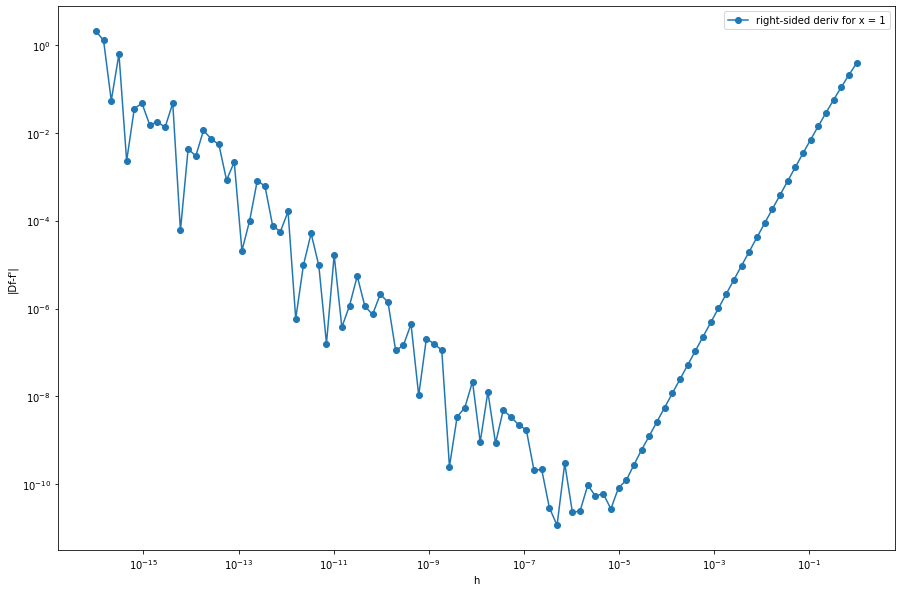

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = 1
h_arr = np.logspace(-16, 0, num=100)
df_forward_arr = np.array([])

for h in h_arr:
    df_forward_arr = np.append(df_forward_arr, np.abs(deriv(f, x, h) - fder(x)))

plt.figure(figsize=(15, 10))
plt.loglog(h_arr, df_forward_arr, 'o-', label=f'right-sided deriv for x = {x}')
plt.xlabel("h")
plt.ylabel("|Df-f'|")
plt.legend()
plt.show()

Если строить зависимость ошибки от шага, то в нуле (т.е. параметр $x = 0$ в ячейке выше) будет линейный спад, но если посмотреть на эту зависимость в других точках (как, например, сделано выше при $x = 1$), то видно, что оптимальный шаг как раз будет иметь порядок $10^{-6}$, что согласуется с результатами полученными теоретически. Так происходит благодаря тому, что возникает погрешность за счет ошибок округления, и ее величина в
этом случае зависит от представления чисел в языке Python, а также потому что мы приближаем производную разностной схемой, что тоже вносит вклад в общую ошибку. Понятно, что при слишком больших шагах будет играть существенную роль второе слогаемое (ошибка из-за приближения), а при слишком маленьких - первое (ошибка при округлении).

# Часть II. Midpoint rule

Напишите функцию, вычисляющую определенный интеграл, используя midpoint rule, с точностью до заданной погрешности $\epsilon$. Оценивайте ошибку, сравнивая значения интеграла для $N$ и $2N$ элементарных интервалов.

In [9]:
import numpy as np

def midpoint_rule(func, a, b, eps):
    """ Вычисляет интеграл f от a до b используя правило центральной точки.
    
    Parameters
    ----------
    func : callable
        Функция, которую нужно проинтегрировать
    a : float
        Нижний предел интегрирования
    b : float
        Верхний предел интегрирования
    eps : float
        Ожидаемая ошибка оценки
        
    Returns
    -------
    integral : float
        Оценка интеграла $\int_a^b f(x) dx$.
    n : int
        The number of intervals on segment.
    """

    n = 1
    q_n = func((a + b) / 2) * (b - a)
    q_2n = (func((a + (a + b) / 2) / 2) + func(((a + b) / 2 + b) / 2)) * (b - a) / 2
    while abs(q_2n - q_n) >= eps:
        n += 1

        h = (b - a) / n
        i = np.arange(1, n + 1)
        q_n = (func((i - 0.5) * h) * h).sum()

        h = (b - a) / (2 * n)
        i = np.arange(1, 2 * n + 1)
        q_2n = (func((i - 0.5) * h) * h).sum()

    integral = q_n 
    return integral, n

### Тест II.1

Протестирутйте ваш алгоритм на простом интеграле, который вы можете посчитать аналитически.

Сравните скорость сходимости с ожидаемой $O(N^{-2})$ в зависимости от количества интервалов, необходимых для заданной точности $\epsilon$.

Сравните полученный результат с ответом, вычисленным "руками". Попадает ли результат в интервал заданной ошибки?

(20% итоговой оценки)


Численное интегрирование дало ответ 8.986686390532546, при количестве интервалов: 13



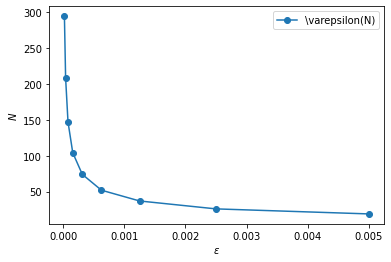

In [10]:
import matplotlib.pyplot as plt

f = lambda x: x ** 2
k = 2
result, n = midpoint_rule(f, 0, 3, 10 ** (-k))
# the real answer is 9
print(f'Численное интегрирование дало ответ {result}, при количестве интервалов: {n}')
print()

eps_list = []
N_list = []
for k in range(1, 10):
  eps = 0.01 / 2 ** k
  result, n = midpoint_rule(f, 0, 3, eps)

  eps_list.append(eps)
  N_list.append(n)

plt.plot(eps_list, N_list, '-o', label=r'\varepsilon(N)')
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'$N$')
plt.legend()
plt.show()

Алгоритм был протестирован на функции $f(x) = x^2$ на интервале $(0, 3)$. Аналитическое решение дает результат равный $9$:

$$
\int \limits_0^3 f(x) dx = \int \limits_0^3  x^2 dx = \frac{x^3}{3} \bigg|_0^3 = 9
$$

Численное решение дало результат (см. ячейку выше) равный $8.986686390532546$, что не укладивается в интервал заданной ошибки ($\varepsilon = 0.01) \ [8.99, 9.01]$.

Также из построенного выше графика видно, что скорость сходимости равна ожидаемой $O(1/N^2)$.

## Тест II.2

Используя ваш алгоритм, посчитайте значение

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

с точностью до $\epsilon=10^{-4}$.

Заметим, что интеграл содержит интегрируемую особенность в нижнем пределе. Выполните вычисление двумя способами: во-первых, посчитайте интеграл "в лоб", во-вторых, вычтите особенность из подынтегрального выражения. Сравните количество необходимых итераций для достижения заданной точности $\epsilon$.

(30% итоговой оценки)

In [11]:
import numpy as np

a = 0
b = 1
eps = 1e-4

# t = sqrt(x) => \int_0^1 (sin(sqrt(x)) / x) dx = 2 * \int_0^1 (sin(t) / t) dt
f_t = lambda t: 2 * np.sin(t) / t
result, n = midpoint_rule(f_t, a, b, eps)
print(f'Прямое вычисление с заменой переменных дало результат: {result}, при количестве интервалов: {n}')

# sin(sqrt(x)) / x = (sin(sqrt(x)) - 1 / sqrt(x)) + 1 / sqrt(x)
# t = sqrt(x) \int_0^1 dx / sqrt(x) => \int_0^1 2 dt == \int_0^1 2 dx
# thus, \int_0^1 sin(sqrt(x)) / x dx = \int_0^1 (sin(sqrt(x)) - 1 / sqrt(x) + 2) dx
f = lambda x: 2 + np.sin(np.sqrt(x)) / x - 1 / np.sqrt(x)
result, n = midpoint_rule(f, a, b, eps)
print(f'Вычисление с вычитанием сингулярности дало результат: {result}, при количестве интервалов: {n}')

Прямое вычисление с заменой переменных дало результат: 1.8922941998480554, при количестве интервалов: 14
Вычисление с вычитанием сингулярности дало результат: 1.8920193180026728, при количестве интервалов: 16


Для вычисления определеннного интеграла методом вычитания сингуляроности потребовалось больше интервалов (а значит и шагов) для достижения заданной точности (см. результат ячейки выше).

# Часть  III 


Вычислите определённый интеграл **методом трапеций**  с вычитанием сингулярности

$$
I = \int_{0}^{1}\frac{e^x}{\sqrt{x(1-x)}}dx.
$$

Преобразуйте данный интеграл, вычитая сингулярности. Выпишите расчетные формулы.

Вам могут пригодиться значения следующих определенных интегралов:

$$
\int_0^1 \frac{1}{\sqrt{x (1-x)}} \, dx=\pi,\quad \int_0^1 \frac{x}{\sqrt{x (1-x)}} \, dx=\frac{\pi}{2}
$$

Заметим, что особыми точками подынтегральной функции $f(x) = \frac{e^x}{\sqrt{x(1-x)}}$ являются $x_1 = 0, \ x_2 = 1$. Чтобы избавиться от сингулярностей в этих точках, составим линейную комбинацию $\lambda$ функций $f, \ g, \ h$, где $g(x) = \frac{1}{\sqrt{x (1-x)}}, \ h(x) = \frac{x}{\sqrt{x (1-x)}}$, так чтобы:

$$
\lim \limits_{x \ \rightarrow \ x_1} \lambda(x) = const_1 \ , \ \lim \limits_{x \ \rightarrow \ x_2} \lambda(x) = const_2
$$

Где $const_1, const_2 \ne \pm \infty$.
Таким образом, $\lambda(x) = a \cdot f(x) + b \cdot g(x) + c \cdot h(x)$. Не умаляя общности, будем считать $a = 1$, тогда $\lambda(x) = f(x) + b \cdot g(x) + c \cdot h(x)$ и пределы в сингулярных точках можно записать следующим образом:


\begin{equation*}
\begin{cases}
\lim \limits_{x \ \rightarrow \ x_1} \left( \frac{e^x \ + \ b \ + \ c \ x}{\sqrt{x (1 - x)}} \right) \\
\lim \limits_{x \ \rightarrow \ x_2} \left( \frac{e^x \ + \ b \ + \ c \ x}{\sqrt{x (1 - x)}} \right)
\end{cases}
\end{equation*}

Врспользуемся разложением в ряд Тейлора для экспоненты около $x_1, \ x_2$:

$$
\text{в точке } x_1 = 0: \ e^x = 1 + x + O(x^2)  \\
\text{в точке } x_2 = 1: \ e^x = e + e(x-1) + O((x-1)^2)
$$

Подставим эти разложения в искомые пределы:

\begin{equation*}
\begin{cases}
\lim \limits_{x \ \rightarrow \ x_1} \left( \frac{e^x \ + \ b \ + \ c \ x}{\sqrt{x (1 - x)}} \right)  = \lim \limits_{x \ \rightarrow \ 0} \left( \frac{(1 + b) \ + \ (1+c) \ x \ + \ O(x^2)}{\sqrt{x (1 - x)}} \right) = \lim \limits_{x \ \rightarrow \ 0} \left(\frac{1+b}{\sqrt{x}}\right) \\
\lim \limits_{x \ \rightarrow \ x_2} \left( \frac{e^x \ + \ b \ + \ c \ x}{\sqrt{x (1 - x)}} \right) = \lim \limits_{x \ \rightarrow \ 1} \left( \frac{b \ + \ (e+c) \ x \ + \ O((x-1)^2)}{\sqrt{x (1 - x)}} \right) = \lim \limits_{x \ \rightarrow \ 1} \left( \frac{b \ + \ e \ + \ c}{\sqrt{1 - x}} \right)
\end{cases}
\end{equation*}

Отюда сразу становится видно, что, для того что бы пределы были конечны, достаточно чтобы коэффициенты линейной комбинации удовлтворяли системе:

\begin{equation*}
\begin{cases}
1 \ + \ b = 0 \\
b \ + \ e \ + \ c = 0
\end{cases}
\end{equation*}

Решая эту систему уравнений, получаем что: $b = -1, \ c = 1 - e$. Откуда: 

$$
\lambda(x) = \frac{e^x - 1 + (1-e)x}{\sqrt{x(1-x)}}
$$

Такая функция ограничена (а значит интегрируема) на $(0, 1)$ , так как: $\lim \limits_{x \ \rightarrow \ x_1} \lambda(x) = 0 \ , \ \lim \limits_{x \ \rightarrow \ x_2} \lambda(x) = 0$.

Значит исходный интеграл можно переписать следующим образом:

$$
I = \int \limits_{0}^{1} f(x) \ dx = \int \limits_{0}^{1} \lambda(x) \ dx - \int \limits_{0}^{1} (b \cdot g(x) + c \cdot h(x)) \ dx = \int \limits_{0}^{1} \lambda(x) \ dx + \frac{\pi}{2}(1 + e)
$$

Сама функция $\lambda(x)$ не определена в точках $x_1, \ x_2$, но её можно доопределить значениями правостороннего и левостороннего предела соответственно.

Cоставьте функцию, возвращающую значение интеграла методом трапеций.

In [12]:
from math import sqrt, pi, e

def integ(npts=10):
    """Compute the value of the integral above.
    
    Subtract the singularities and use the trapezoid rule. 
    
    Parameters
    ----------
    npts : int
        The number of points for the trapezoid rule
        
    Returns
    -------
    I : float
       The computed value of the integral
    """

    def f(x):
      if x == 0 or x == 1:
        return 0
      return  (e ** x - 1 + (1 - e) * x) / sqrt(x * (1 - x))

    n = npts - 1
    h = (1 - 0) / n
    not_not_I= sum([f(i * h) for i in range(1, n)])
    not_I = h * ((f(0) + f(1)) / 2 + not_not_I)

    return not_I + pi * (1 + e) / 2
    

In [13]:
# this is a test to check your computed value
from numpy.testing import assert_allclose
